## Linear regression with statsmodels (OLS)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval_measures
import scipy.stats as stats
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import datasets, model_selection

We load the boston house-prices dataset and `X` are our features and `y` is the target variable `medv` (Median value of owner-occupied homes in $1000s).

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's split the data in a test and training set.

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

## Fitting models - the standard way
### Full model without an intercept


In [4]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              626.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                   5.52e-229
Time:                        23:37:38   Log-Likelihood:                         -1056.2
No. Observations:                 354   AIC:                                      2138.
Df Residuals:                     341   BIC:                                      2189.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

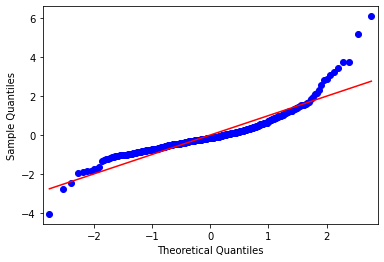

In [5]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [6]:
result.pvalues < 0.05

CRIM       False
ZN          True
INDUS      False
CHAS        True
NOX        False
RM          True
AGE        False
DIS         True
RAD        False
TAX        False
PTRATIO     True
B           True
LSTAT       True
dtype: bool

In [7]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(y_train, result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(y_train, result.fittedvalues)))

rsquared: 0.959822581672449
mse: 22.85994999778429
rmse: 4.781208006119822


### Full model with an intercept


In [8]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     72.96
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.85e-90
Time:                        23:37:38   Log-Likelihood:                -1034.3
No. Observations:                 354   AIC:                             2097.
Df Residuals:                     340   BIC:                             2151.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5016      5.908      6.686      0.0

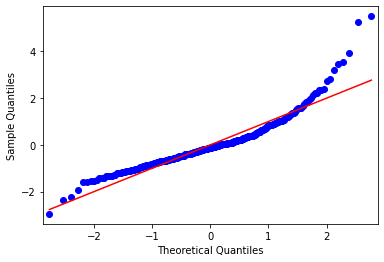

In [9]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [10]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(y_train, result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(y_train, result.fittedvalues)))

rsquared: 0.7361141271744145
mse: 20.203480618671588
rmse: 4.494828207915358


## Fitting models using R-style formulas
We can also fit a model with the R syntax `y ~ x_1 + x_2` and build some complexer models.

In [11]:
dat = X_train.copy()
dat['MEDV'] = y_train
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44,16.0
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
296,0.05372,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,27.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2


### Full model with an intercept

In [12]:
result = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     55.01
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.93e-72
Time:                        23:37:38   Log-Likelihood:                -1079.5
No. Observations:                 354   AIC:                             2185.
Df Residuals:                     341   BIC:                             2235.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8843      6.428      3.560      0.0

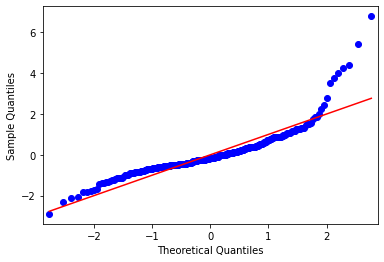

In [13]:
fig = sm.qqplot(result.resid, fit=True, line="s")

plt.show()

In [14]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(y_train, result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(y_train, result.fittedvalues)))

rsquared: 0.6593995370266135
mse: 26.076859585967927
rmse: 5.106550654401455


### Model with a polynomial and the target variable log transformed

In [15]:
result = smf.ols('np.log(MEDV) ~ CRIM + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + pow(AGE, 2)', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     75.51
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.85e-80
Time:                        23:37:38   Log-Likelihood:                 30.035
No. Observations:                 354   AIC:                            -38.07
Df Residuals:                     343   BIC:                             4.492
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.2226      0.279     11.553      

Let's plot the QQ-Plot for the residuals

In [16]:
result.pvalues < 0.05

Intercept      True
CRIM           True
CHAS           True
NOX            True
RM             True
DIS            True
RAD            True
TAX            True
PTRATIO        True
B              True
pow(AGE, 2)    True
dtype: bool

In [17]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(np.log(y_train), result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(np.log(y_train), result.fittedvalues)))

rsquared: 0.6876463271879514
mse: 0.049411693888693736
rmse: 0.2222874127985967


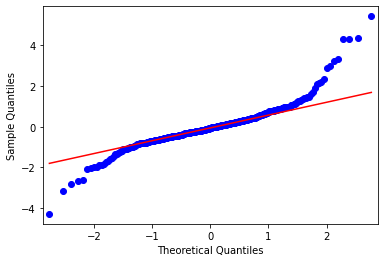

In [18]:
fig = sm.qqplot(result.resid, fit=True, line="q")
plt.show()